## Yucatan Hurricane Data

This study used computer modeling to study the impacts of hurricanes across the Yucatan Peninsula since 1851.

Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
hurricanes = pd.read_csv("data/hurricanes.csv")

In [74]:
hurricanes.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

In [75]:
hurricanes.isnull().sum()

code           0
start.date     0
end.date       0
number         0
name          72
ss             0
track          0
rf.max         0
dtype: int64

In [76]:
hurricanes.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


## 3 Brainstorm Data Wrangling

1) Change date column to datetime
2) We want to look at the intensity and frequency of hurricanes across time
3) Index by date
4) Create duration column



In [77]:
# Change column names to eliminate periods
hurricanes.columns = hurricanes.columns.str.replace(".", "_")

In [78]:
# Change start_date to datetime
hurricanes.start_date = pd.to_datetime(hurricanes.start_date)
hurricanes.end_date = pd.to_datetime(hurricanes.end_date)


In [79]:
# Duration
hurricanes['duration'] = hurricanes['end_date'] - hurricanes['start_date']

In [80]:
hurricanes = hurricanes.set_index('start_date')

In [81]:
hurricanes.head()

,code,end_date,number,name,ss,track,rf_max,duration
start_date,,,,,,,,
1852-10-07,Y1852,1852-10-08,5,NaN,2,O,F1,1 days
1857-09-28,Y1857,1857-09-28,4,NaN,2,N,F1,0 days
1861-08-17,Y1861,1861-08-17,2,NaN,1,O,Nd,0 days
1864-08-31,Y1864,1864-08-31,3,NaN,1,S,F1,0 days
1865-09-11,Y1865,1865-09-11,4,NaN,2,O,F1,0 days


In [98]:
hurricane_cat5 = hurricanes.loc[hurricanes['ss'] == 5]
print("there are", len(hurricane_cat5), "category 5 hurricanes")

there are 4 category 5 hurricanes


In [92]:
hurricane_cat4 = hurricanes.loc[hurricanes['ss'] == 4]
hurricane_cat4

,code,end_date,number,name,ss,track,rf_max,duration
start_date,,,,,,,,
1951-08-19,Y1951,1951-08-20,3,Charlie,4,N,F2,1 days
1961-10-31,Y1961c,1961-10-31,9,Hattie,4,S,F2,0 days
1966-10-06,Y1966,1966-10-07,9,Inez,4,O,F2,1 days
1969-08-15,Y1969a,1969-08-16,3,Camille,4,O,F0,1 days
1974-09-02,Y1974a,1974-09-06,6,Carmen,4,N,F3,4 days
2000-10-01,Y2000,2000-10-03,15,Keith,4,S,F2,2 days


In [99]:
hurricane_cat3 = hurricanes.loc[hurricanes['ss'] == 3]
hurricane_cat3

print("there are", len(hurricane_cat5), "category 5 hurricanes")
print("there are", len(hurricane_cat4), "category 4 hurricanes")
print("there are", len(hurricane_cat3), "category 3 hurricanes")

there are 4 category 5 hurricanes
there are 6 category 4 hurricanes
there are 18 category 3 hurricanes


In [82]:
# Create empty figure
fig1 = plt.figure()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Hurricane Intensity Over Time in the Yucutan Peninsula')

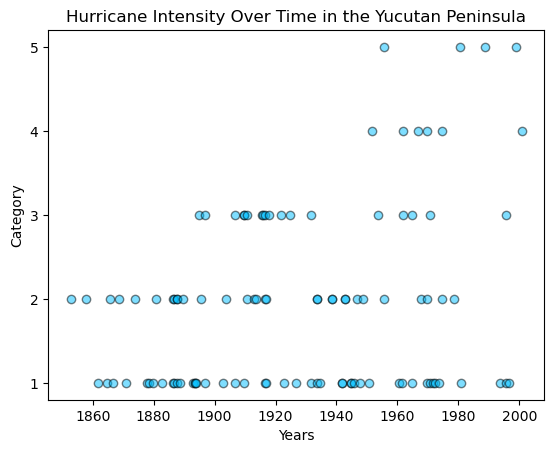

In [83]:
plt.scatter(hurricanes.index, hurricanes.ss, 
           color = 'deepskyblue',
           linewidths = 1,
           edgecolors = 'black',
           alpha = .5)
plt.yticks([1,2,3,4,5]) # Change ticks y axis
plt.xlabel('Years') # Add label to x axis
plt.ylabel('Category') # Add label to y axis
plt.title('Hurricane Intensity Over Time in the Yucutan Peninsula')


Category 4 and 5 hurricanes didn't start showing up until the 1950s. This could be because hurricanes are getting more intense, or because we changed the way that we categorize hurricanes. 